# 4Layered 5Fold KAN with Explanations

/home/sharmila/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


/home/sharmila/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Fold 1


/home/sharmila/.local/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [10/100], Train Loss: 0.8789, Val Loss: 0.0617, Train Accuracy: 1.0000, Val Accuracy: 0.9863
Early stopping at epoch 11


/tmp/ipykernel_3147269/3078098171.py:338: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model.pth'))


Fold 1 Validation Accuracy: 0.9838
Fold 2
Epoch [10/100], Train Loss: 0.8696, Val Loss: 0.0970, Train Accuracy: 1.0000, Val Accuracy: 0.9838
Early stopping at epoch 11
Fold 2 Validation Accuracy: 0.9788
Fold 3
Epoch [10/100], Train Loss: 0.8707, Val Loss: 0.0713, Train Accuracy: 1.0000, Val Accuracy: 0.9888
Early stopping at epoch 12
Fold 3 Validation Accuracy: 0.9906
Fold 4
Epoch [10/100], Train Loss: 0.5322, Val Loss: 0.0440, Train Accuracy: 1.0000, Val Accuracy: 0.9900
Early stopping at epoch 11
Fold 4 Validation Accuracy: 0.9913
Fold 5
Epoch [10/100], Train Loss: 0.8675, Val Loss: 0.0604, Train Accuracy: 1.0000, Val Accuracy: 0.9838
Early stopping at epoch 11
Fold 5 Validation Accuracy: 0.9894
Average Validation Accuracy: 0.9868
Final Test Accuracy: 0.9860

Classification Report:
              precision    recall  f1-score   support

      Benign       0.98      0.99      0.98       885
   Malicious       0.99      0.98      0.99      1121

    accuracy                           0.

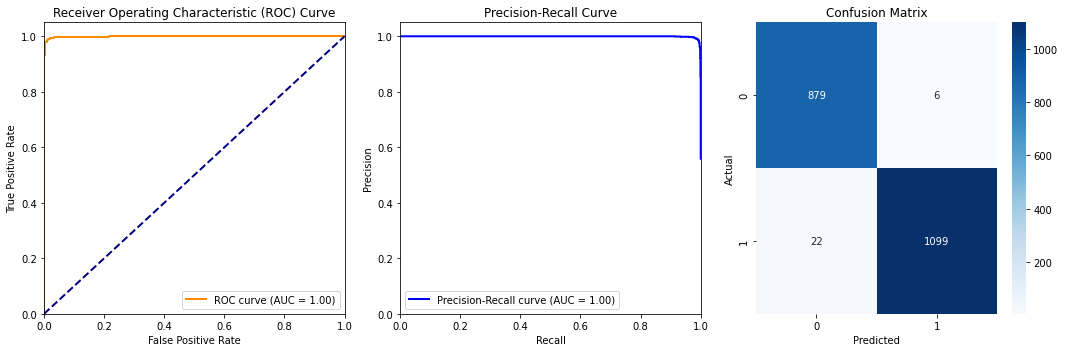

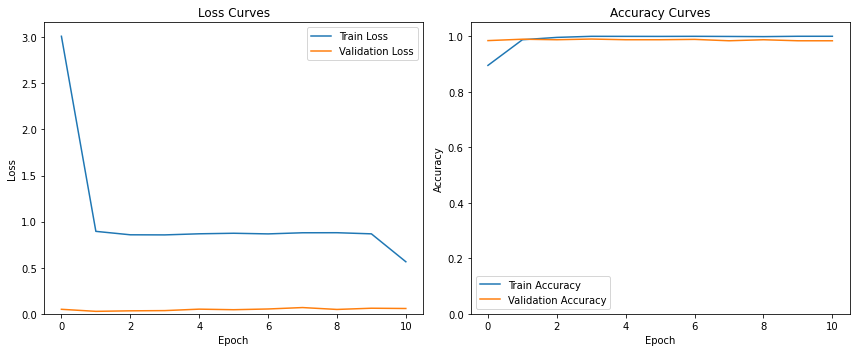

/home/sharmila/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4, 5, 6, 8, 9, 12, 15, 18, 19] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/sharmila/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4, 5, 6, 8, 9, 12, 15, 18, 19] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/sharmila/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4, 5, 6, 8, 9, 12, 15, 18, 19] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


The PDF1 is classified as: Malicious
The PDF2 is classified as: Malicious


/tmp/ipykernel_3147269/3078098171.py:546: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


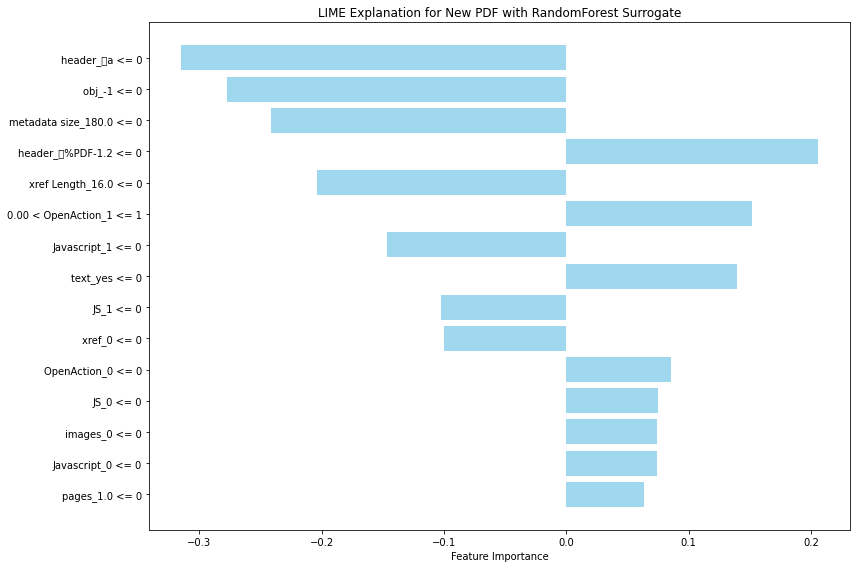


Feature Importances:
header_	a <= 0: -0.3149
obj_-1 <= 0: -0.2770
metadata size_180.0 <= 0: -0.2410
header_	%PDF-1.2 <= 0: 0.2054
xref Length_16.0 <= 0: -0.2039
0.00 < OpenAction_1 <= 1: 0.1518
Javascript_1 <= 0: -0.1466
text_yes <= 0: 0.1396
JS_1 <= 0: -0.1027
xref_0 <= 0: -0.0998
OpenAction_0 <= 0: 0.0854
JS_0 <= 0: 0.0749
images_0 <= 0: 0.0740
Javascript_0 <= 0: 0.0737
pages_1.0 <= 0: 0.0632

Prediction Probabilities: Benign: 0.0044, Malicious: 0.9956


In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, auc, roc_curve
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import math
import lime
import lime.lime_tabular
import shap
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


class KANLinear(nn.Module):
    def __init__(
        self,
        in_features,
        out_features,
        grid_size=3,
        spline_order=3,
        scale_noise=0.05,
        scale_base=1.0,
        scale_spline=0.5,
        enable_standalone_scale_spline=True,
        base_activation=None,  # Pass None by default
        grid_eps=0.02,
        grid_range=[-1, 1],
    ):
        super(KANLinear, self).__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.grid_size = grid_size
        self.spline_order = spline_order

        h = (grid_range[1] - grid_range[0]) / grid_size
        grid = (
            (
                torch.arange(-spline_order, grid_size + spline_order + 1) * h
                + grid_range[0]
            )
            .expand(in_features, -1)
            .contiguous()
        )
        self.register_buffer("grid", grid)

        self.base_weight = nn.Parameter(torch.Tensor(out_features, in_features))
        self.spline_weight = nn.Parameter(
            torch.Tensor(out_features, in_features, grid_size + spline_order)
        )
        if enable_standalone_scale_spline:
            self.spline_scaler = nn.Parameter(
                torch.Tensor(out_features, in_features)
            )

        self.scale_noise = scale_noise
        self.scale_base = scale_base
        self.scale_spline = scale_spline
        self.enable_standalone_scale_spline = enable_standalone_scale_spline
        self.base_activation = base_activation() if base_activation is not None else nn.GELU()  # Instantiate GELU if not provided
        self.grid_eps = grid_eps

        self.reset_parameters()
        
        
    def reset_parameters(self):
        nn.init.kaiming_uniform_(self.base_weight, a=math.sqrt(5) * self.scale_base)
        with torch.no_grad():
            noise = (
                (
                    torch.rand(self.grid_size + 1, self.in_features, self.out_features)
                    - 1 / 2
                )
                * self.scale_noise
                / self.grid_size
            )
            self.spline_weight.data.copy_(
                (self.scale_spline if not self.enable_standalone_scale_spline else 1.0)
                * self.curve2coeff(
                    self.grid.T[self.spline_order : -self.spline_order],
                    noise,
                )
            )
            if self.enable_standalone_scale_spline:
                nn.init.kaiming_uniform_(self.spline_scaler, a=math.sqrt(5) * self.scale_spline)

    def b_splines(self, x: torch.Tensor):
        assert x.dim() == 2 and x.size(1) == self.in_features

        grid: torch.Tensor = self.grid
        x = x.unsqueeze(-1)
        bases = ((x >= grid[:, :-1]) & (x < grid[:, 1:])).to(x.dtype)
        for k in range(1, self.spline_order + 1):
            bases = (
                (x - grid[:, : -(k + 1)])
                / (grid[:, k:-1] - grid[:, : -(k + 1)])
                * bases[:, :, :-1]
            ) + (
                (grid[:, k + 1 :] - x)
                / (grid[:, k + 1 :] - grid[:, 1:(-k)])
                * bases[:, :, 1:]
            )

        assert bases.size() == (
            x.size(0),
            self.in_features,
            self.grid_size + self.spline_order,
        )
        return bases.contiguous()

    def curve2coeff(self, x: torch.Tensor, y: torch.Tensor):
        assert x.dim() == 2 and x.size(1) == self.in_features
        assert y.size() == (x.size(0), self.in_features, self.out_features)

        A = self.b_splines(x).transpose(0, 1)
        B = y.transpose(0, 1)
        solution = torch.linalg.lstsq(A, B).solution
        result = solution.permute(2, 0, 1)

        assert result.size() == (
            self.out_features,
            self.in_features,
            self.grid_size + self.spline_order,
        )
        return result.contiguous()

    @property
    def scaled_spline_weight(self):
        return self.spline_weight * (
            self.spline_scaler.unsqueeze(-1)
            if self.enable_standalone_scale_spline
            else 1.0
        )

    def forward(self, x: torch.Tensor):
        assert x.dim() == 2 and x.size(1) == self.in_features

        base_output = F.linear(self.base_activation(x), self.base_weight)
        spline_output = F.linear(
            self.b_splines(x).view(x.size(0), -1),
            self.scaled_spline_weight.view(self.out_features, -1),
        )
        return base_output + spline_output

    def regularization_loss(self, regularize_activation=1.0, regularize_entropy=1.0):
        l1_fake = self.spline_weight.abs().mean(-1)
        regularization_loss_activation = l1_fake.sum()
        p = l1_fake / regularization_loss_activation
        regularization_loss_entropy = -torch.sum(p * p.log())
        return (
            regularize_activation * regularization_loss_activation
            + regularize_entropy * regularization_loss_entropy
        )

class KAN(nn.Module):
    def __init__(
        self,
        layers_hidden,
        grid_size=3,
        spline_order=3,
        scale_noise=0.05,
        scale_base=1.0,
        scale_spline=0.5,
        base_activation=nn.GELU,
        grid_eps=0.02,
        grid_range=[-1, 1],
    ):
        super(KAN, self).__init__()
        self.grid_size = grid_size
        self.spline_order = spline_order

        self.layers = nn.ModuleList()
        for in_features, out_features in zip(layers_hidden, layers_hidden[1:]):
            self.layers.append(
                KANLinear(
                    in_features,
                    out_features,
                    grid_size=grid_size,
                    spline_order=spline_order,
                    scale_noise=scale_noise,
                    scale_base=scale_base,
                    scale_spline=scale_spline,
                    base_activation=base_activation,
                    grid_eps=grid_eps,
                    grid_range=grid_range,
                )
            )

    def forward(self, x: torch.Tensor):
        for layer in self.layers:
            x = layer(x)
        return x

    def regularization_loss(self, regularize_activation=0.01, regularize_entropy=0.01):
        return sum(
            layer.regularization_loss(regularize_activation, regularize_entropy)
            for layer in self.layers
        )

class ShapKANWrapper(nn.Module):
    def __init__(self, model):
        super().__init__()
        self.model = model

    def forward(self, x):
        return self.model(x)

# Load and preprocess data
data = pd.read_csv('/home/sharmila/MyCodes/PDFMalware/OurData.csv')

def clean_and_convert(value):
    if isinstance(value, str):
        if value.lower() in ['yes', 'no']:
            return value.lower()
        try:
            return str(int(value.split('(')[0]))
        except ValueError:
            return value
    return str(value)


features = data[feature_columns].copy()

for column in feature_columns:
    features[column] = features[column].apply(clean_and_convert)

categorical_features = feature_columns

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ])

target = data['Class']
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(target)

unique_classes = np.unique(target_encoded)
if len(unique_classes) > 2:
    print(f"Warning: Found {len(unique_classes)} classes. Reducing to 2 classes.")
    target_encoded = np.where(target_encoded > 0, 1, target_encoded)

X_train, X_test, y_train, y_test = train_test_split(features, target_encoded, test_size=0.2, random_state=42)

preprocessor.fit(X_train)
X_train_preprocessed = preprocessor.transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

X_train_tensor = torch.tensor(X_train_preprocessed, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test_preprocessed, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Training function
def train_model(model, X_train, y_train, X_val, y_val, num_epochs=100, batch_size=64):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-4)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=5, verbose=True)

    best_val_loss = float('inf')
    patience = 10
    counter = 0

    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0
        train_correct = 0
        for i in range(0, len(X_train), batch_size):
            batch_X = X_train[i:i+batch_size]
            batch_y = y_train[i:i+batch_size]

            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)+ model.regularization_loss()
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            train_correct += (predicted == batch_y).sum().item()

        train_loss /= len(X_train) / batch_size
        train_accuracy = train_correct / len(X_train)

        model.eval()
        with torch.no_grad():
            val_outputs = model(X_val)
            val_loss = criterion(val_outputs, y_val)
            _, val_predicted = torch.max(val_outputs, 1)
            val_accuracy = (val_predicted == y_val).sum().item() / y_val.size(0)
            
            scheduler.step(val_accuracy)

            if val_loss < best_val_loss:
                best_val_loss = val_loss
                counter = 0
                torch.save(model.state_dict(), 'best_model.pth')
            else:
                counter += 1
                if counter >= patience:
                    print(f"Early stopping at epoch {epoch}")
                    break

        train_losses.append(train_loss)
        val_losses.append(val_loss.item())
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)

        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch + 1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, '
                  f'Train Accuracy: {train_accuracy:.4f}, Val Accuracy: {val_accuracy:.4f}')

    model.load_state_dict(torch.load('best_model.pth'))
    return model, train_losses, val_losses, train_accuracies, val_accuracies

# K-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

fold_results = []
all_train_losses = []
all_val_losses = []
all_train_accuracies = []
all_val_accuracies = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X_train_tensor)):
    print(f"Fold {fold + 1}")
    X_train_fold, X_val_fold = X_train_tensor[train_idx], X_train_tensor[val_idx]
    y_train_fold, y_val_fold = y_train_tensor[train_idx], y_train_tensor[val_idx]
    
    model = KAN(layers_hidden=[X_train_tensor.shape[1], 128, 64, 32, 2])
    
    model, train_losses, val_losses, train_accuracies, val_accuracies = train_model(
        model, X_train_fold, y_train_fold, X_val_fold, y_val_fold
    )
    
    all_train_losses.extend(train_losses)
    all_val_losses.extend(val_losses)
    all_train_accuracies.extend(train_accuracies)
    all_val_accuracies.extend(val_accuracies)
    
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val_fold)
        _, val_predicted = torch.max(val_outputs, 1)
        val_accuracy = (val_predicted == y_val_fold).sum().item() / y_val_fold.size(0)
    
    fold_results.append(val_accuracy)
    print(f"Fold {fold + 1} Validation Accuracy: {val_accuracy:.4f}")


print(f"Average Validation Accuracy: {np.mean(fold_results):.4f}")

# Final evaluation on test set
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    _, predicted = torch.max(test_outputs, 1)
    accuracy = (predicted == y_test_tensor).sum().item() / y_test_tensor.size(0)
    print(f'Final Test Accuracy: {accuracy:.4f}')

    y_test_np = y_test_tensor.numpy()
    y_pred_np = predicted.numpy()
    y_scores = torch.softmax(test_outputs, dim=1)[:, 1].numpy()

    print("\nClassification Report:")
    print(classification_report(y_test_np, y_pred_np, target_names=['Benign', 'Malicious']))

    # Confusion Matrix
    cm = confusion_matrix(y_test_np, y_pred_np)
    print("\nConfusion Matrix:")
    print(cm)

    # ROC AUC Score
    roc_auc = roc_auc_score(y_test_np, y_scores)
    print(f"\nROC AUC Score: {roc_auc:.4f}")

# Plotting
plt.figure(figsize=(15, 5))

# ROC Curve
plt.subplot(1, 3, 1)
fpr, tpr, _ = roc_curve(y_test_np, y_scores)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Precision-Recall Curve
plt.subplot(1, 3, 2)
precision, recall, _ = precision_recall_curve(y_test_np, y_scores)
pr_auc = auc(recall, precision)
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (AUC = {pr_auc:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

# Confusion Matrix
plt.subplot(1, 3, 3)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.0, max(max(train_losses), max(val_losses)) * 1.05])  # Add small offset to y-axis
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1.05])  # Ensure y-axis is from 0 to 1
plt.legend()

plt.tight_layout()
plt.show()

# LIME explanations
def predict_proba(x):
    x_tensor = torch.tensor(x, dtype=torch.float32)
    with torch.no_grad():
        output = model(x_tensor)
    return torch.softmax(output, dim=1).numpy()

# Custom surrogate model class
class CustomSurrogateLimeTabularExplainer(lime.lime_tabular.LimeTabularExplainer):
    def __init__(self, *args, surrogate_model=None, **kwargs):
        super().__init__(*args, **kwargs)
        # Set the surrogate model to RandomForest with parameter tuning
        self.surrogate_model = surrogate_model if surrogate_model is not None else RandomForestClassifier(n_estimators=100, max_depth=10)

    def explain_instance(self, *args, **kwargs):
        # Use the custom surrogate model to explain the instance
        explanation = super().explain_instance(*args, **kwargs)
        explanation.surrogate_model = self.surrogate_model
        return explanation

# Initialize LIME explainer with RandomForestClassifier as surrogate model
explainer = CustomSurrogateLimeTabularExplainer(
    X_train_preprocessed,
    feature_names=preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features),
    class_names=['Benign', 'Malicious'],
    mode='classification',
    surrogate_model=RandomForestClassifier(n_estimators=50, max_depth=5),
    discretize_continuous=True,
    discretizer='quartile',
    feature_selection='lasso_path'
)

# Function to classify a new PDF
def classify_pdf(pdf_features):
    pdf_features_dict = {name: clean_and_convert(value) for name, value in zip(feature_columns, pdf_features)}
    pdf_features_df = pd.DataFrame([pdf_features_dict])
    pdf_features_preprocessed = preprocessor.transform(pdf_features_df)
    pdf_features_tensor = torch.tensor(pdf_features_preprocessed, dtype=torch.float32)
    
    with torch.no_grad():
        output = model(pdf_features_tensor)
        _, predicted = torch.max(output, 1)
    
    predicted_label = 'Malicious' if predicted.item() == 1 else 'Benign'
    return predicted_label


# Classify and explain a new PDF
new_pdf_features = [1024, 256, 10, 100, 20, 'No', 0, 5, 'Yes', 'Yes', 100, 100, 50, 50, 1, 1, 1, 10, 'No', 0, 1, 1, 1, 0, 0, 0, 0, 0, 0]
new_pdf_features = [228, 438, 5, 1473, 4, 1, 1, 11, 2, 127, 25, 16, 1, 1 , 1, 2, 1, 1, 3, 3, 2, 2, 1, 1, 1, 1, 1, 1, 1, 34]
result1 = classify_pdf(new_pdf_features)
result2 = classify_pdf(new_pdf_features)
print(f"The PDF1 is classified as: {result1}")
print(f"The PDF2 is classified as: {result2}")
# Preprocess the new PDF features for LIME
new_pdf_features_dict = {name: clean_and_convert(value) for name, value in zip(feature_columns, new_pdf_features)}
new_pdf_features_df = pd.DataFrame([new_pdf_features_dict])
new_pdf_features_preprocessed = preprocessor.transform(new_pdf_features_df)

# Get LIME explanation for the new PDF using RandomForest surrogate model
exp = explainer.explain_instance(new_pdf_features_preprocessed[0], predict_proba, num_features=15, num_samples=5000)

def format_feature_range(feature):
    if '<=' in feature:
        name, value = feature.split(' <= ')
        value = float(value)
        return f"{name} <= {value:.0f}"
    elif '>' in feature:
        name, value = feature.split(' > ')
        value = float(value)
        return f"{name} > {value:.0f}"
    else:
        return feature
    
# Display the explanation using a bar chart
features_imp = [(format_feature_range(feature), importance) for feature, importance in exp.as_list()]
features, importances = zip(*features_imp)

plt.figure(figsize=(12, 8))
y_pos = np.arange(len(features))
plt.barh(y_pos, importances, align='center', alpha=0.8, color='skyblue')
plt.yticks(y_pos, features)
plt.xlabel('Feature Importance')
plt.title('LIME Explanation for New PDF with RandomForest Surrogate')
plt.gca().invert_yaxis()  # Invert y-axis to have most important feature on top
plt.tight_layout()
plt.show()

# Print feature importances
print("\nFeature Importances:")
for feature, importance in features_imp:
    print(f"{feature}: {importance:.4f}")
    
# Get prediction probabilities for the new PDF
pred_probs = predict_proba(new_pdf_features_preprocessed)[0]
print(f'\nPrediction Probabilities: Benign: {pred_probs[0]:.4f}, Malicious: {pred_probs[1]:.4f}')

# All Final is here for - Our dataset

/home/sharmila/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


/home/sharmila/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Fold 1


/home/sharmila/.local/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [10/100], Train Loss: 0.8727, Val Loss: 0.0738, Train Accuracy: 0.9997, Val Accuracy: 0.9869
Early stopping at epoch 11


/tmp/ipykernel_1532846/1524676259.py:338: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model.pth'))


Fold 1 Validation Accuracy: 0.9838
Fold 2
Epoch [10/100], Train Loss: 0.8705, Val Loss: 0.1078, Train Accuracy: 1.0000, Val Accuracy: 0.9800
Early stopping at epoch 11
Fold 2 Validation Accuracy: 0.9800
Fold 3
Epoch [10/100], Train Loss: 0.8757, Val Loss: 0.0499, Train Accuracy: 0.9997, Val Accuracy: 0.9919
Early stopping at epoch 14
Fold 3 Validation Accuracy: 0.9950
Fold 4
Epoch [10/100], Train Loss: 0.8821, Val Loss: 0.0575, Train Accuracy: 0.9984, Val Accuracy: 0.9888
Early stopping at epoch 11
Fold 4 Validation Accuracy: 0.9913
Fold 5
Epoch [10/100], Train Loss: 0.5324, Val Loss: 0.0507, Train Accuracy: 1.0000, Val Accuracy: 0.9894
Early stopping at epoch 11
Fold 5 Validation Accuracy: 0.9900
Average Validation Accuracy: 0.9880
Final Test Accuracy: 0.9870

Classification Report:
              precision    recall  f1-score   support

      Benign       0.98      0.99      0.99       885
   Malicious       0.99      0.98      0.99      1121

    accuracy                           0.

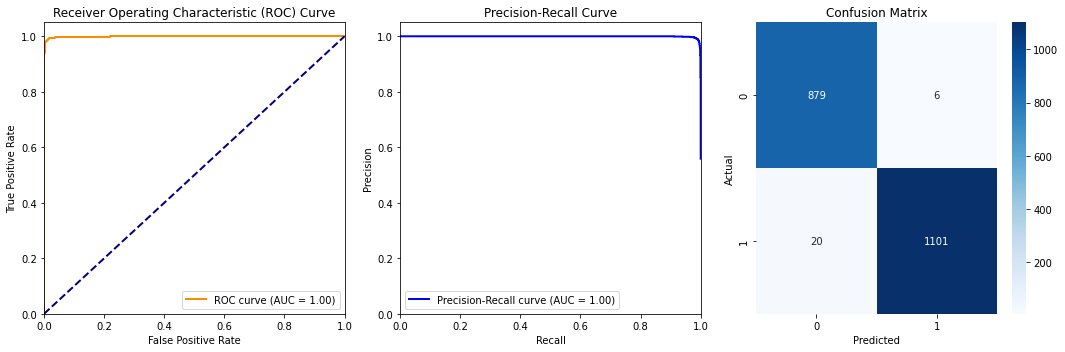

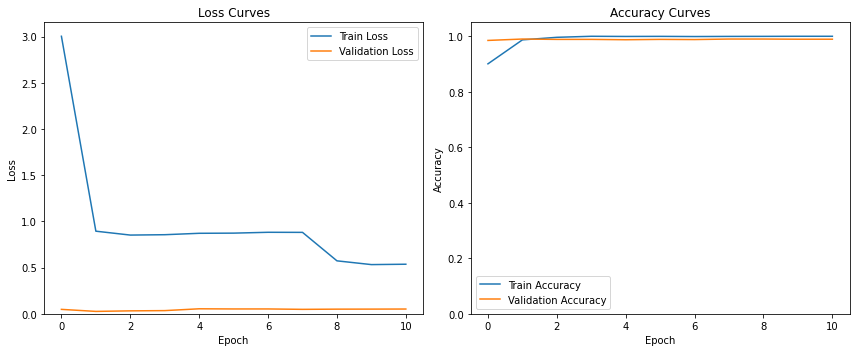

/home/sharmila/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4, 5, 6, 9, 12, 15, 18, 19] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/sharmila/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4, 5, 6, 8, 9, 12, 15, 18, 19] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/sharmila/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4, 5, 6, 9, 12, 15, 18, 19] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


The PDF1 is classified as: Benign
The PDF2 is classified as: Malicious


/tmp/ipykernel_1532846/1524676259.py:546: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


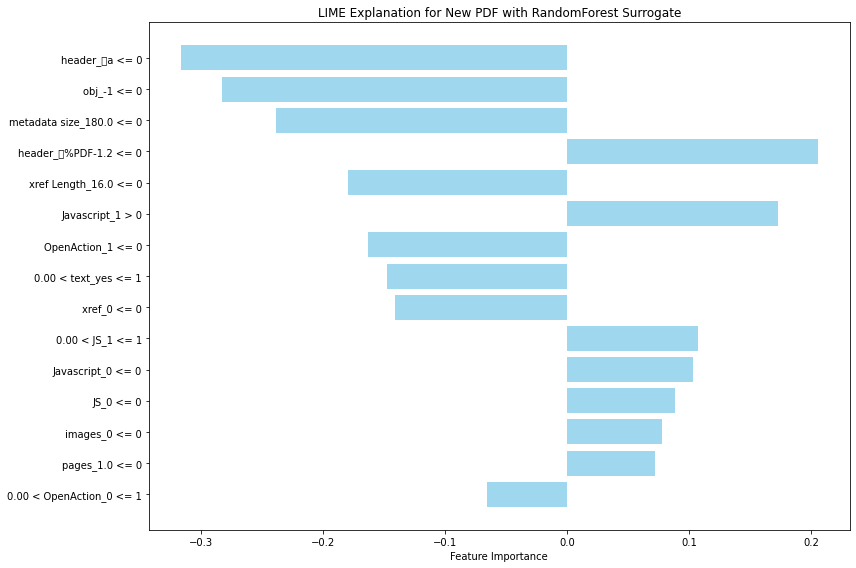


Feature Importances:
header_	a <= 0: -0.3163
obj_-1 <= 0: -0.2829
metadata size_180.0 <= 0: -0.2388
header_	%PDF-1.2 <= 0: 0.2056
xref Length_16.0 <= 0: -0.1796
Javascript_1 > 0: 0.1733
OpenAction_1 <= 0: -0.1633
0.00 < text_yes <= 1: -0.1473
xref_0 <= 0: -0.1406
0.00 < JS_1 <= 1: 0.1077
Javascript_0 <= 0: 0.1032
JS_0 <= 0: 0.0887
images_0 <= 0: 0.0783
pages_1.0 <= 0: 0.0721
0.00 < OpenAction_0 <= 1: -0.0652

Prediction Probabilities: Benign: 0.7907, Malicious: 0.2093


In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, auc, roc_curve
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import math
import lime
import lime.lime_tabular
import shap
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


class KANLinear(nn.Module):
    def __init__(
        self,
        in_features,
        out_features,
        grid_size=3,
        spline_order=3,
        scale_noise=0.05,
        scale_base=1.0,
        scale_spline=0.5,
        enable_standalone_scale_spline=True,
        base_activation=None,  # Pass None by default
        grid_eps=0.02,
        grid_range=[-1, 1],
    ):
        super(KANLinear, self).__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.grid_size = grid_size
        self.spline_order = spline_order

        h = (grid_range[1] - grid_range[0]) / grid_size
        grid = (
            (
                torch.arange(-spline_order, grid_size + spline_order + 1) * h
                + grid_range[0]
            )
            .expand(in_features, -1)
            .contiguous()
        )
        self.register_buffer("grid", grid)

        self.base_weight = nn.Parameter(torch.Tensor(out_features, in_features))
        self.spline_weight = nn.Parameter(
            torch.Tensor(out_features, in_features, grid_size + spline_order)
        )
        if enable_standalone_scale_spline:
            self.spline_scaler = nn.Parameter(
                torch.Tensor(out_features, in_features)
            )

        self.scale_noise = scale_noise
        self.scale_base = scale_base
        self.scale_spline = scale_spline
        self.enable_standalone_scale_spline = enable_standalone_scale_spline
        self.base_activation = base_activation() if base_activation is not None else nn.GELU()  # Instantiate GELU if not provided
        self.grid_eps = grid_eps

        self.reset_parameters()
        
        
    def reset_parameters(self):
        nn.init.kaiming_uniform_(self.base_weight, a=math.sqrt(5) * self.scale_base)
        with torch.no_grad():
            noise = (
                (
                    torch.rand(self.grid_size + 1, self.in_features, self.out_features)
                    - 1 / 2
                )
                * self.scale_noise
                / self.grid_size
            )
            self.spline_weight.data.copy_(
                (self.scale_spline if not self.enable_standalone_scale_spline else 1.0)
                * self.curve2coeff(
                    self.grid.T[self.spline_order : -self.spline_order],
                    noise,
                )
            )
            if self.enable_standalone_scale_spline:
                nn.init.kaiming_uniform_(self.spline_scaler, a=math.sqrt(5) * self.scale_spline)

    def b_splines(self, x: torch.Tensor):
        assert x.dim() == 2 and x.size(1) == self.in_features

        grid: torch.Tensor = self.grid
        x = x.unsqueeze(-1)
        bases = ((x >= grid[:, :-1]) & (x < grid[:, 1:])).to(x.dtype)
        for k in range(1, self.spline_order + 1):
            bases = (
                (x - grid[:, : -(k + 1)])
                / (grid[:, k:-1] - grid[:, : -(k + 1)])
                * bases[:, :, :-1]
            ) + (
                (grid[:, k + 1 :] - x)
                / (grid[:, k + 1 :] - grid[:, 1:(-k)])
                * bases[:, :, 1:]
            )

        assert bases.size() == (
            x.size(0),
            self.in_features,
            self.grid_size + self.spline_order,
        )
        return bases.contiguous()

    def curve2coeff(self, x: torch.Tensor, y: torch.Tensor):
        assert x.dim() == 2 and x.size(1) == self.in_features
        assert y.size() == (x.size(0), self.in_features, self.out_features)

        A = self.b_splines(x).transpose(0, 1)
        B = y.transpose(0, 1)
        solution = torch.linalg.lstsq(A, B).solution
        result = solution.permute(2, 0, 1)

        assert result.size() == (
            self.out_features,
            self.in_features,
            self.grid_size + self.spline_order,
        )
        return result.contiguous()

    @property
    def scaled_spline_weight(self):
        return self.spline_weight * (
            self.spline_scaler.unsqueeze(-1)
            if self.enable_standalone_scale_spline
            else 1.0
        )

    def forward(self, x: torch.Tensor):
        assert x.dim() == 2 and x.size(1) == self.in_features

        base_output = F.linear(self.base_activation(x), self.base_weight)
        spline_output = F.linear(
            self.b_splines(x).view(x.size(0), -1),
            self.scaled_spline_weight.view(self.out_features, -1),
        )
        return base_output + spline_output

    def regularization_loss(self, regularize_activation=1.0, regularize_entropy=1.0):
        l1_fake = self.spline_weight.abs().mean(-1)
        regularization_loss_activation = l1_fake.sum()
        p = l1_fake / regularization_loss_activation
        regularization_loss_entropy = -torch.sum(p * p.log())
        return (
            regularize_activation * regularization_loss_activation
            + regularize_entropy * regularization_loss_entropy
        )

class KAN(nn.Module):
    def __init__(
        self,
        layers_hidden,
        grid_size=3,
        spline_order=3,
        scale_noise=0.05,
        scale_base=1.0,
        scale_spline=0.5,
        base_activation=nn.GELU,
        grid_eps=0.02,
        grid_range=[-1, 1],
    ):
        super(KAN, self).__init__()
        self.grid_size = grid_size
        self.spline_order = spline_order

        self.layers = nn.ModuleList()
        for in_features, out_features in zip(layers_hidden, layers_hidden[1:]):
            self.layers.append(
                KANLinear(
                    in_features,
                    out_features,
                    grid_size=grid_size,
                    spline_order=spline_order,
                    scale_noise=scale_noise,
                    scale_base=scale_base,
                    scale_spline=scale_spline,
                    base_activation=base_activation,
                    grid_eps=grid_eps,
                    grid_range=grid_range,
                )
            )

    def forward(self, x: torch.Tensor):
        for layer in self.layers:
            x = layer(x)
        return x

    def regularization_loss(self, regularize_activation=0.01, regularize_entropy=0.01):
        return sum(
            layer.regularization_loss(regularize_activation, regularize_entropy)
            for layer in self.layers
        )

class ShapKANWrapper(nn.Module):
    def __init__(self, model):
        super().__init__()
        self.model = model

    def forward(self, x):
        return self.model(x)

# Load and preprocess data
data = pd.read_csv('/home/sharmila/MyCodes/PDFMalware/OurData.csv')

def clean_and_convert(value):
    if isinstance(value, str):
        if value.lower() in ['yes', 'no']:
            return value.lower()
        try:
            return str(int(value.split('(')[0]))
        except ValueError:
            return value
    return str(value)



features = data[feature_columns].copy()

for column in feature_columns:
    features[column] = features[column].apply(clean_and_convert)

categorical_features = feature_columns

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ])

target = data['Class']
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(target)

unique_classes = np.unique(target_encoded)
if len(unique_classes) > 2:
    print(f"Warning: Found {len(unique_classes)} classes. Reducing to 2 classes.")
    target_encoded = np.where(target_encoded > 0, 1, target_encoded)

X_train, X_test, y_train, y_test = train_test_split(features, target_encoded, test_size=0.2, random_state=42)

preprocessor.fit(X_train)
X_train_preprocessed = preprocessor.transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

X_train_tensor = torch.tensor(X_train_preprocessed, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test_preprocessed, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Training function
def train_model(model, X_train, y_train, X_val, y_val, num_epochs=100, batch_size=64):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-4)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=5, verbose=True)

    best_val_loss = float('inf')
    patience = 10
    counter = 0

    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0
        train_correct = 0
        for i in range(0, len(X_train), batch_size):
            batch_X = X_train[i:i+batch_size]
            batch_y = y_train[i:i+batch_size]

            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)+ model.regularization_loss()
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            train_correct += (predicted == batch_y).sum().item()

        train_loss /= len(X_train) / batch_size
        train_accuracy = train_correct / len(X_train)

        model.eval()
        with torch.no_grad():
            val_outputs = model(X_val)
            val_loss = criterion(val_outputs, y_val)
            _, val_predicted = torch.max(val_outputs, 1)
            val_accuracy = (val_predicted == y_val).sum().item() / y_val.size(0)
            
            scheduler.step(val_accuracy)

            if val_loss < best_val_loss:
                best_val_loss = val_loss
                counter = 0
                torch.save(model.state_dict(), 'best_model.pth')
            else:
                counter += 1
                if counter >= patience:
                    print(f"Early stopping at epoch {epoch}")
                    break

        train_losses.append(train_loss)
        val_losses.append(val_loss.item())
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)

        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch + 1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, '
                  f'Train Accuracy: {train_accuracy:.4f}, Val Accuracy: {val_accuracy:.4f}')

    model.load_state_dict(torch.load('best_model.pth'))
    return model, train_losses, val_losses, train_accuracies, val_accuracies

# K-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

fold_results = []
all_train_losses = []
all_val_losses = []
all_train_accuracies = []
all_val_accuracies = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X_train_tensor)):
    print(f"Fold {fold + 1}")
    X_train_fold, X_val_fold = X_train_tensor[train_idx], X_train_tensor[val_idx]
    y_train_fold, y_val_fold = y_train_tensor[train_idx], y_train_tensor[val_idx]
    
    model = KAN(layers_hidden=[X_train_tensor.shape[1], 128, 64, 32, 2])
    
    model, train_losses, val_losses, train_accuracies, val_accuracies = train_model(
        model, X_train_fold, y_train_fold, X_val_fold, y_val_fold
    )
    
    all_train_losses.extend(train_losses)
    all_val_losses.extend(val_losses)
    all_train_accuracies.extend(train_accuracies)
    all_val_accuracies.extend(val_accuracies)
    
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val_fold)
        _, val_predicted = torch.max(val_outputs, 1)
        val_accuracy = (val_predicted == y_val_fold).sum().item() / y_val_fold.size(0)
    
    fold_results.append(val_accuracy)
    print(f"Fold {fold + 1} Validation Accuracy: {val_accuracy:.4f}")


print(f"Average Validation Accuracy: {np.mean(fold_results):.4f}")

# Final evaluation on test set
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    _, predicted = torch.max(test_outputs, 1)
    accuracy = (predicted == y_test_tensor).sum().item() / y_test_tensor.size(0)
    print(f'Final Test Accuracy: {accuracy:.4f}')

    y_test_np = y_test_tensor.numpy()
    y_pred_np = predicted.numpy()
    y_scores = torch.softmax(test_outputs, dim=1)[:, 1].numpy()

    print("\nClassification Report:")
    print(classification_report(y_test_np, y_pred_np, target_names=['Benign', 'Malicious']))

    # Confusion Matrix
    cm = confusion_matrix(y_test_np, y_pred_np)
    print("\nConfusion Matrix:")
    print(cm)

    # ROC AUC Score
    roc_auc = roc_auc_score(y_test_np, y_scores)
    print(f"\nROC AUC Score: {roc_auc:.4f}")

# Plotting
plt.figure(figsize=(15, 5))

# ROC Curve
plt.subplot(1, 3, 1)
fpr, tpr, _ = roc_curve(y_test_np, y_scores)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Precision-Recall Curve
plt.subplot(1, 3, 2)
precision, recall, _ = precision_recall_curve(y_test_np, y_scores)
pr_auc = auc(recall, precision)
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (AUC = {pr_auc:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

# Confusion Matrix
plt.subplot(1, 3, 3)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.0, max(max(train_losses), max(val_losses)) * 1.05])  # Add small offset to y-axis
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1.05])  # Ensure y-axis is from 0 to 1
plt.legend()

plt.tight_layout()
plt.show()

# LIME explanations
def predict_proba(x):
    x_tensor = torch.tensor(x, dtype=torch.float32)
    with torch.no_grad():
        output = model(x_tensor)
    return torch.softmax(output, dim=1).numpy()

# Custom surrogate model class
class CustomSurrogateLimeTabularExplainer(lime.lime_tabular.LimeTabularExplainer):
    def __init__(self, *args, surrogate_model=None, **kwargs):
        super().__init__(*args, **kwargs)
        # Set the surrogate model to RandomForest with parameter tuning
        self.surrogate_model = surrogate_model if surrogate_model is not None else RandomForestClassifier(n_estimators=100, max_depth=10)

    def explain_instance(self, *args, **kwargs):
        # Use the custom surrogate model to explain the instance
        explanation = super().explain_instance(*args, **kwargs)
        explanation.surrogate_model = self.surrogate_model
        return explanation

# Initialize LIME explainer with RandomForestClassifier as surrogate model
explainer = CustomSurrogateLimeTabularExplainer(
    X_train_preprocessed,
    feature_names=preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features),
    class_names=['Benign', 'Malicious'],
    mode='classification',
    surrogate_model=RandomForestClassifier(n_estimators=50, max_depth=5),
    discretize_continuous=True,
    discretizer='quartile',
    feature_selection='lasso_path'
)

# Function to classify a new PDF
def classify_pdf(pdf_features):
    pdf_features_dict = {name: clean_and_convert(value) for name, value in zip(feature_columns, pdf_features)}
    pdf_features_df = pd.DataFrame([pdf_features_dict])
    pdf_features_preprocessed = preprocessor.transform(pdf_features_df)
    pdf_features_tensor = torch.tensor(pdf_features_preprocessed, dtype=torch.float32)
    
    with torch.no_grad():
        output = model(pdf_features_tensor)
        _, predicted = torch.max(output, 1)
    
    predicted_label = 'Malicious' if predicted.item() == 1 else 'Benign'
    return predicted_label


# Classify and explain a new PDF
new_pdf_features = [1024, 256, 10, 100, 20, 'No', 0, 5, 'Yes', 'Yes', 100, 100, 50, 50, 1, 1, 1, 10, 'No', 0, 1, 1, 1, 0, 0, 0, 0, 0, 0]
new_pdf_features2 = [228, 438, 5, 1473, 4, 1, 1, 11, 2, 127, 25, 16, 1, 1 , 1, 2, 1, 1, 3, 3, 2, 2, 1, 1, 1, 1, 1, 1, 1, 34] # generated sample
result1 = classify_pdf(new_pdf_features)
result2 = classify_pdf(new_pdf_features2)
print(f"The PDF1 is classified as: {result1}")
print(f"The PDF2 is classified as: {result2}")
# Preprocess the new PDF features for LIME
new_pdf_features_dict = {name: clean_and_convert(value) for name, value in zip(feature_columns, new_pdf_features)}
new_pdf_features_df = pd.DataFrame([new_pdf_features_dict])
new_pdf_features_preprocessed = preprocessor.transform(new_pdf_features_df)

# Get LIME explanation for the new PDF using RandomForest surrogate model
exp = explainer.explain_instance(new_pdf_features_preprocessed[0], predict_proba, num_features=15, num_samples=5000)

def format_feature_range(feature):
    if '<=' in feature:
        name, value = feature.split(' <= ')
        value = float(value)
        return f"{name} <= {value:.0f}"
    elif '>' in feature:
        name, value = feature.split(' > ')
        value = float(value)
        return f"{name} > {value:.0f}"
    else:
        return feature
    
# Display the explanation using a bar chart
features_imp = [(format_feature_range(feature), importance) for feature, importance in exp.as_list()]
features, importances = zip(*features_imp)

plt.figure(figsize=(12, 8))
y_pos = np.arange(len(features))
plt.barh(y_pos, importances, align='center', alpha=0.8, color='skyblue')
plt.yticks(y_pos, features)
plt.xlabel('Feature Importance')
plt.title('LIME Explanation for New PDF with RandomForest Surrogate')
plt.gca().invert_yaxis()  # Invert y-axis to have most important feature on top
plt.tight_layout()
plt.show()

# Print feature importances
print("\nFeature Importances:")
for feature, importance in features_imp:
    print(f"{feature}: {importance:.4f}")
    
# Get prediction probabilities for the new PDF
pred_probs = predict_proba(new_pdf_features_preprocessed)[0]
print(f'\nPrediction Probabilities: Benign: {pred_probs[0]:.4f}, Malicious: {pred_probs[1]:.4f}')

/home/sharmila/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4, 5, 6, 9, 12, 15, 18, 19] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/sharmila/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4, 5, 6, 8, 9, 12, 15, 18, 19] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/sharmila/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4, 5, 6, 9, 12, 15, 18, 19] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


The PDF1 is classified as: Benign
The PDF2 is classified as: Malicious


/tmp/ipykernel_1532846/3038157987.py:38: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


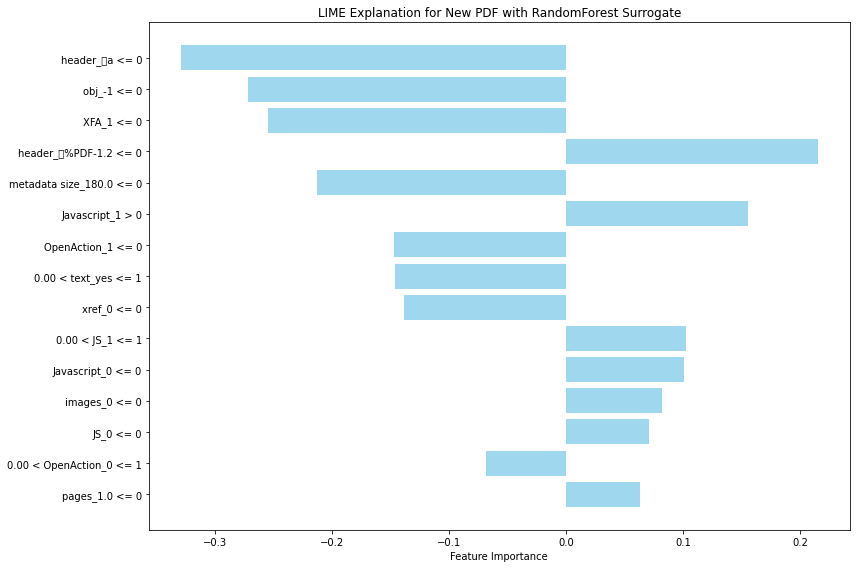


Feature Importances:
header_	a <= 0: -0.3292
obj_-1 <= 0: -0.2720
XFA_1 <= 0: -0.2549
header_	%PDF-1.2 <= 0: 0.2151
metadata size_180.0 <= 0: -0.2129
Javascript_1 > 0: 0.1555
OpenAction_1 <= 0: -0.1471
0.00 < text_yes <= 1: -0.1460
xref_0 <= 0: -0.1385
0.00 < JS_1 <= 1: 0.1024
Javascript_0 <= 0: 0.1012
images_0 <= 0: 0.0821
JS_0 <= 0: 0.0711
0.00 < OpenAction_0 <= 1: -0.0687
pages_1.0 <= 0: 0.0635

Prediction Probabilities: Benign: 0.7907, Malicious: 0.2093
As its malicious threshold is greater than 0.10 : sample is suspicious : submit for dynamic analysis 


In [9]:
#Smpl-1
new_pdf_features = [1024, 256, 10, 100, 20, 'No', 0, 5, 'Yes', 'Yes', 100, 100, 50, 50, 1, 1, 1, 10, 'No', 0, 1, 1, 1, 0, 0, 0, 0, 0, 0]
#Smpl-2
new_pdf_features2 = [228, 438, 5, 1473, 4, 1, 1, 11, 2, 127, 25, 16, 1, 1 , 1, 2, 1, 1, 3, 3, 2, 2, 1, 1, 1, 1, 1, 1, 1, 34]
result1 = classify_pdf(new_pdf_features)
result2 = classify_pdf(new_pdf_features2)
print(f"The PDF1 is classified as: {result1}")
print(f"The PDF2 is classified as: {result2}")
# Preprocess the new PDF features for LIME
new_pdf_features_dict = {name: clean_and_convert(value) for name, value in zip(feature_columns, new_pdf_features)}
new_pdf_features_df = pd.DataFrame([new_pdf_features_dict])
new_pdf_features_preprocessed = preprocessor.transform(new_pdf_features_df)

# Get LIME explanation for the new PDF using RandomForest surrogate model
exp = explainer.explain_instance(new_pdf_features_preprocessed[0], predict_proba, num_features=15, num_samples=5000)

def format_feature_range(feature):
    if '<=' in feature:
        name, value = feature.split(' <= ')
        value = float(value)
        return f"{name} <= {value:.0f}"
    elif '>' in feature:
        name, value = feature.split(' > ')
        value = float(value)
        return f"{name} > {value:.0f}"
    else:
        return feature
    
# Display the explanation using a bar chart
features_imp = [(format_feature_range(feature), importance) for feature, importance in exp.as_list()]
features, importances = zip(*features_imp)

plt.figure(figsize=(12, 8))
y_pos = np.arange(len(features))
plt.barh(y_pos, importances, align='center', alpha=0.8, color='skyblue')
plt.yticks(y_pos, features)
plt.xlabel('Feature Importance')
plt.title('LIME Explanation for New PDF with RandomForest Surrogate')
plt.gca().invert_yaxis()  # Invert y-axis to have most important feature on top
plt.tight_layout()
plt.show()

# Print feature importances
print("\nFeature Importances:")
for feature, importance in features_imp:
    print(f"{feature}: {importance:.4f}")
    
# Get prediction probabilities for the new PDF
pred_probs = predict_proba(new_pdf_features_preprocessed)[0]
print(f'\nPrediction Probabilities: Benign: {pred_probs[0]:.4f}, Malicious: {pred_probs[1]:.4f}')

#print('pred_probs[0]=' pred_probs[0])
#print('pred_probs[1]=' pred_probs[1])

if pred_probs[1] > 0.10:
    print("As its malicious threshold is greater than 0.10 : sample is suspicious : submit for dynamic analysis ")
else:
    print("It is benign")